In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib.axes import Axes

# Load, Join and Filter the Data

In [2]:
df_apples = pd.read_csv("../data/processed/apple-consumption.csv")
df_visits = pd.read_csv("../data/processed/doctor-visits.csv")

In [3]:
df = pd.merge(df_apples, df_visits, on=["country", "year"])

In [4]:
# We consider the year that had the most data
chosen_year = 2017
df = df[df["year"] == chosen_year].reset_index(drop=True)

# Utils

In [5]:
def set_plot_labels(
    ax: Axes,
    xlabel: str | None = None,
    ylabel: str | None = None,
    title: str | None = None,
) -> None:
    """
    Set labels and title for a matplotlib plot.

    Parameters:
    ax (Axes): The matplotlib axes object to modify.
    xlabel (str | None, optional): The label for the x-axis. Default is None.
    ylabel (str | None, optional): The label for the y-axis. Default is None.
    title (str | None, optional): The title of the plot. Default is None.

    Returns:
    None
    """
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)

In [6]:
figsize = (10, 5)

In [7]:
# Countries labeled in the regplots (some are removed to prevent overlapping)
selected_countries = [
    "Austria",
    "Canada",
    "Chile",
    "Colombia",
    "Czechia",
    "Finland",
    "France",
    "Germany",
    "Hungary",
    "Ireland",
    "Italy",
    "Japan",
    "Lithuania",
    "Luxembourg",
    "Mexico",
    "Netherlands",
    "Poland",
    "Romania",
    "South Korea",
    "Spain",
    "Sweden",
    "Switzerland",
    "Turkey",
    "United States",
]

# Data Visualization

In [8]:
df["apple_consumption_per_capita_kg"].describe()

count    30.000000
mean     15.986984
std      12.117811
min       0.849999
25%       8.460002
50%      13.609997
75%      20.387501
max      57.189995
Name: apple_consumption_per_capita_kg, dtype: float64

In [9]:
df["doctor_visits_per_capita"].describe()

count    30.000000
mean      8.133333
std       3.854897
min       2.100000
25%       5.325000
50%       7.500000
75%      11.100000
max      18.200000
Name: doctor_visits_per_capita, dtype: float64

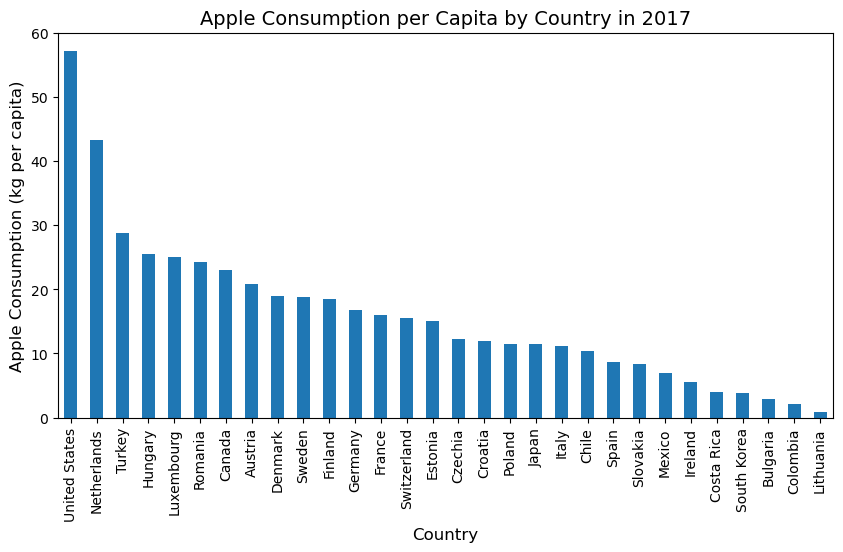

In [10]:
ax = df.sort_values(
    by="apple_consumption_per_capita_kg", ascending=False
).plot(
    x="country",
    y="apple_consumption_per_capita_kg",
    kind="bar",
    figsize=figsize,
    legend=False,
)

set_plot_labels(
    ax=ax,
    xlabel="Country",
    ylabel="Apple Consumption (kg per capita)",
    title=f"Apple Consumption per Capita by Country in {chosen_year}",
)
plt.xticks(rotation=90)
plt.show()

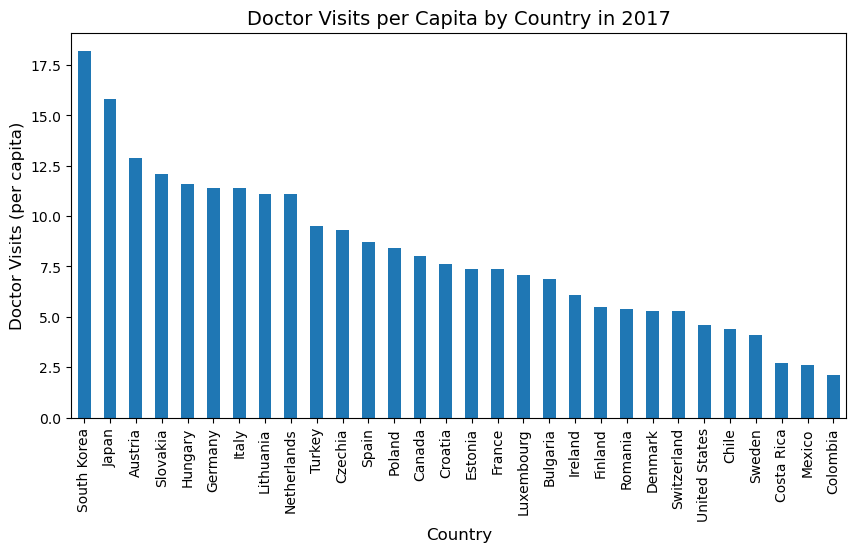

In [11]:
ax = df.sort_values(by="doctor_visits_per_capita", ascending=False).plot(
    x="country",
    y="doctor_visits_per_capita",
    kind="bar",
    figsize=figsize,
    legend=False,
)

set_plot_labels(
    ax=ax,
    xlabel="Country",
    ylabel="Doctor Visits (per capita)",
    title=f"Doctor Visits per Capita by Country in {chosen_year}",
)
plt.xticks(rotation=90)
plt.show()

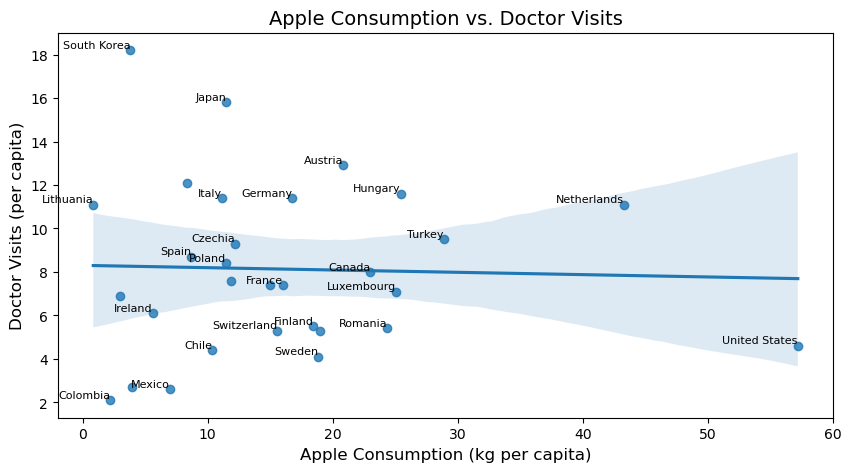

In [12]:
fig, ax = plt.subplots(figsize=figsize)

sns.regplot(
    data=df,
    x="apple_consumption_per_capita_kg",
    y="doctor_visits_per_capita",
    ax=ax,
)

for i, txt in enumerate(df["country"]):
    if txt in selected_countries:
        ax.text(
            df["apple_consumption_per_capita_kg"].iloc[i],
            df["doctor_visits_per_capita"].iloc[i],
            txt,
            fontsize=8,
            ha="right",
            va="bottom",
        )

set_plot_labels(
    ax=ax,
    xlabel="Apple Consumption (kg per capita)",
    ylabel="Doctor Visits (per capita)",
    title="Apple Consumption vs. Doctor Visits",
)

# Data Analysis

## Naïve Model

In [13]:
X = df["apple_consumption_per_capita_kg"]
y = df["doctor_visits_per_capita"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     doctor_visits_per_capita   R-squared:                       0.001
Model:                                  OLS   Adj. R-squared:                 -0.035
No. Observations:                        30   F-statistic:                   0.03155
Covariance Type:                  nonrobust   Prob (F-statistic):              0.860
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               8.3039      1.198      6.932      0.000       5.850      10.758
apple_consumption_per_capita_kg    -0.0107      0.060     -0.178      0.860      -0.134       0.112
===================================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## With Confounders

In [14]:
df_gdp = pd.read_csv("../data/processed/gdp.csv")
df_age = pd.read_csv("../data/processed/median-age.csv")

In [15]:
df = df.merge(df_gdp, on=["country", "year"]).merge(
    df_age, on=["country", "year"]
)

In [16]:
df["gdp_per_capita_k"].describe()

count     30.000000
mean      42.479698
std       20.416387
min       14.334915
25%       28.518921
50%       40.253803
75%       52.790581
max      114.985840
Name: gdp_per_capita_k, dtype: float64

In [17]:
df["median_age"].describe()

count    30.000000
mean     39.380767
std       4.776186
min      26.918000
25%      38.564000
50%      40.919500
75%      41.984250
max      46.535000
Name: median_age, dtype: float64

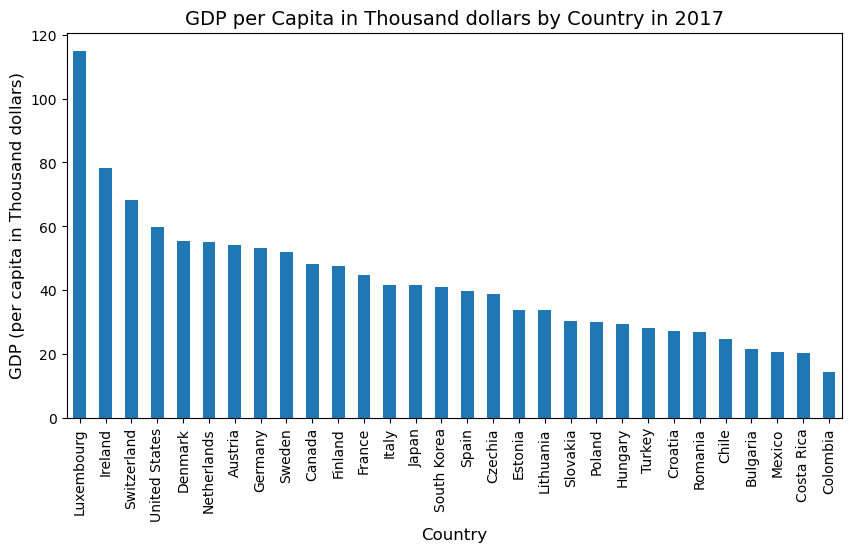

In [18]:
ax = df.sort_values(by="gdp_per_capita_k", ascending=False).plot(
    x="country",
    y="gdp_per_capita_k",
    kind="bar",
    figsize=figsize,
    legend=False,
)

set_plot_labels(
    ax=ax,
    xlabel="Country",
    ylabel="GDP (per capita in Thousand dollars)",
    title=f"GDP per Capita in Thousand dollars by Country in {chosen_year}",
)
plt.xticks(rotation=90)
plt.show()

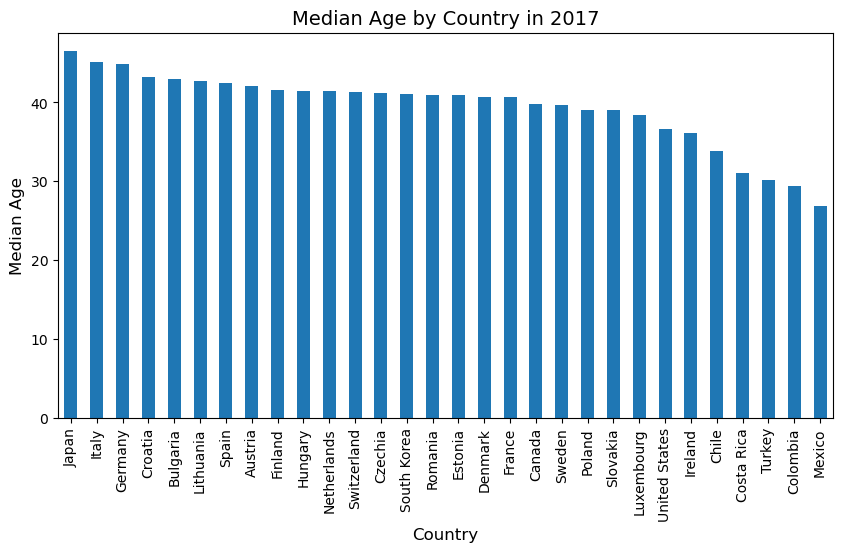

In [19]:
ax = df.sort_values(by="median_age", ascending=False).plot(
    x="country",
    y="median_age",
    kind="bar",
    figsize=figsize,
    legend=False,
)

set_plot_labels(
    ax=ax,
    xlabel="Country",
    ylabel="Median Age",
    title=f"Median Age by Country in {chosen_year}",
)
plt.xticks(rotation=90)
plt.show()

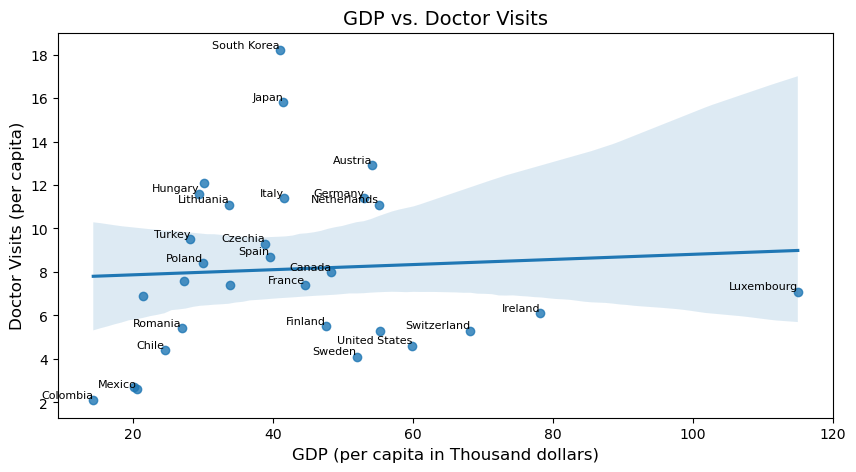

In [20]:
fig, ax = plt.subplots(figsize=figsize)

sns.regplot(
    data=df,
    x="gdp_per_capita_k",
    y="doctor_visits_per_capita",
    ax=ax,
)

for i, txt in enumerate(df["country"]):
    if txt in selected_countries:
        ax.text(
            df["gdp_per_capita_k"].iloc[i],
            df["doctor_visits_per_capita"].iloc[i],
            txt,
            fontsize=8,
            ha="right",
            va="bottom",
        )

set_plot_labels(
    ax=ax,
    xlabel="GDP (per capita in Thousand dollars)",
    ylabel="Doctor Visits (per capita)",
    title="GDP vs. Doctor Visits",
)

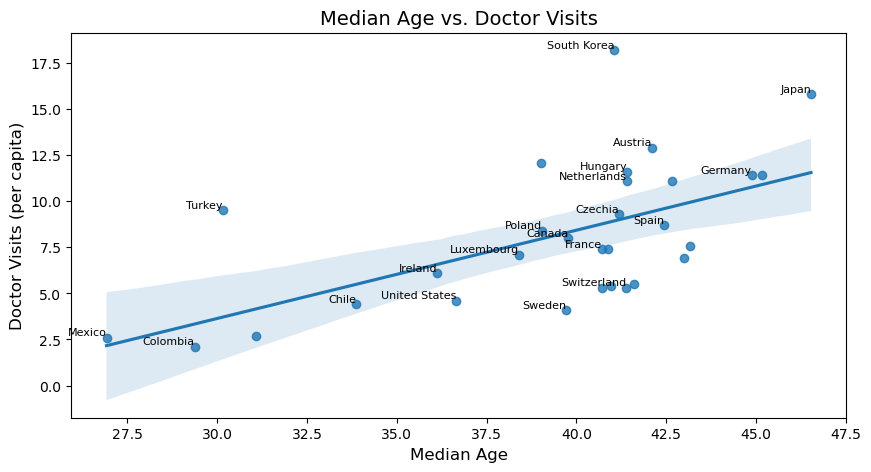

In [21]:
fig, ax = plt.subplots(figsize=figsize)

sns.regplot(
    data=df,
    x="median_age",
    y="doctor_visits_per_capita",
    ax=ax,
)

for i, txt in enumerate(df["country"]):
    # Some more filtering is needed to avoid overlapping
    if txt in selected_countries and txt not in [
        "Italy",
        "Finland",
        "Lithuania",
        "Romania",
    ]:
        ax.text(
            df["median_age"].iloc[i],
            df["doctor_visits_per_capita"].iloc[i],
            txt,
            fontsize=8,
            ha="right",
            va="bottom",
        )

set_plot_labels(
    ax=ax,
    xlabel="Median Age",
    ylabel="Doctor Visits (per capita)",
    title="Median Age vs. Doctor Visits",
)

In [22]:
X = df[["apple_consumption_per_capita_kg", "gdp_per_capita_k", "median_age"]]
y = df["doctor_visits_per_capita"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     doctor_visits_per_capita   R-squared:                       0.360
Model:                                  OLS   Adj. R-squared:                  0.287
No. Observations:                        30   F-statistic:                     4.885
Covariance Type:                  nonrobust   Prob (F-statistic):            0.00797
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -10.5983      5.058     -2.095      0.046     -20.995      -0.202
apple_consumption_per_capita_kg    -0.0100      0.054     -0.185      0.855      -0.121       0.101
gdp_per_capita_k                   -0.0143      0.033     -0.434      0.668      -0.082       0.054
median_age                          0.4952      0.131      3.787      0.001       0.226       0.764
===================================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

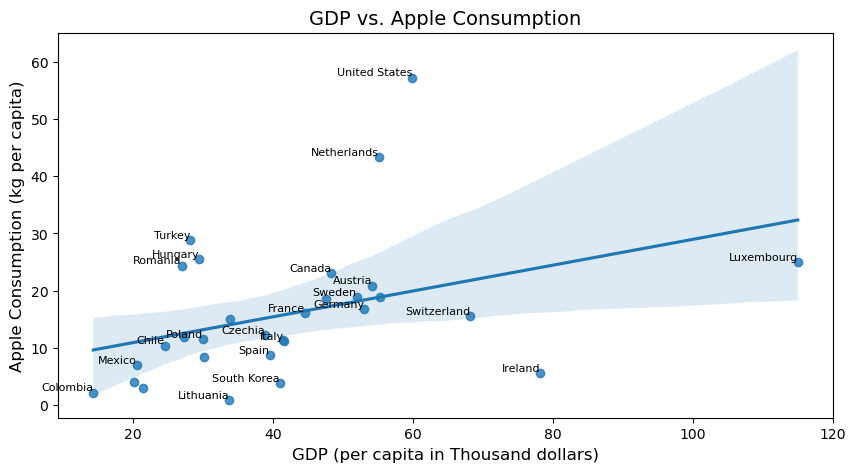

In [23]:
fig, ax = plt.subplots(figsize=figsize)

sns.regplot(
    data=df,
    x="gdp_per_capita_k",
    y="apple_consumption_per_capita_kg",
    ax=ax,
)

for i, txt in enumerate(df["country"]):
    # Some more filtering is needed to avoid overlapping
    if txt in selected_countries and txt not in ["Japan", "Finland"]:
        ax.text(
            df["gdp_per_capita_k"].iloc[i],
            df["apple_consumption_per_capita_kg"].iloc[i],
            txt,
            fontsize=8,
            ha="right",
            va="bottom",
        )

set_plot_labels(
    ax=ax,
    xlabel="GDP (per capita in Thousand dollars)",
    ylabel="Apple Consumption (kg per capita)",
    title="GDP vs. Apple Consumption",
)

In [24]:
X = df["gdp_per_capita_k"]
y = df["apple_consumption_per_capita_kg"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     apple_consumption_per_capita_kg   R-squared:                       0.145
Model:                                         OLS   Adj. R-squared:                  0.114
No. Observations:                               30   F-statistic:                     4.732
Covariance Type:                         nonrobust   Prob (F-statistic):             0.0382
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.4000      4.874      1.313      0.200      -3.584      16.384
gdp_per_capita_k     0.2257      0.104      2.175      0.038       0.013       0.438
====================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""